<a href="https://colab.research.google.com/github/nithin0310/Supermart-Sales-Analysis/blob/main/Supermart_Grocery_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [4]:
# Display first few rows
print(df.head(6))
print(df.shape)
print(df.info())
print(df.describe())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   
5      OD6        Adavan       Food Grains   Organic Staples   Dharmapuri   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  
5  06-09-2015   West   2305      0.26  322.70  Tamil Nadu  
(9994, 11)
<class 'pandas.core.frame.Dat

In [5]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', errors='coerce')


In [6]:
# Extract month and year
df['month'] = df['Order Date'].dt.month_name()
df['year'] = df['Order Date'].dt.year

In [7]:
# Check for null and duplicate values
print(df.isna().sum())
print(df.duplicated().sum())


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
month            0
year             0
dtype: int64
0


In [8]:
# Rename columns for consistency
df.rename(columns={'Order ID': 'order_id', 'Customer Name': 'customer_name', 'Category': 'category',
                    'Sub Category': 'sub_category', 'City': 'city', 'Order Date': 'order_date',
                    'Region': 'region', 'Sales': 'sales', 'Discount': 'discount', 'Profit': 'profit',
                    'State': 'state'}, inplace=True)


In [9]:
# Calculate discount amount
df['discount_amt'] = (df['sales'] * df['discount']).round().astype(int)


In [10]:
# Group sales by category and sub-category
category_sales = df.groupby('category')['sales'].sum().reset_index()
sub_category_sales = df.groupby('sub_category')['sales'].sum().reset_index()


<ipython-input-11-d38208ec1a44>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='sales', data=category_sales, palette='coolwarm')


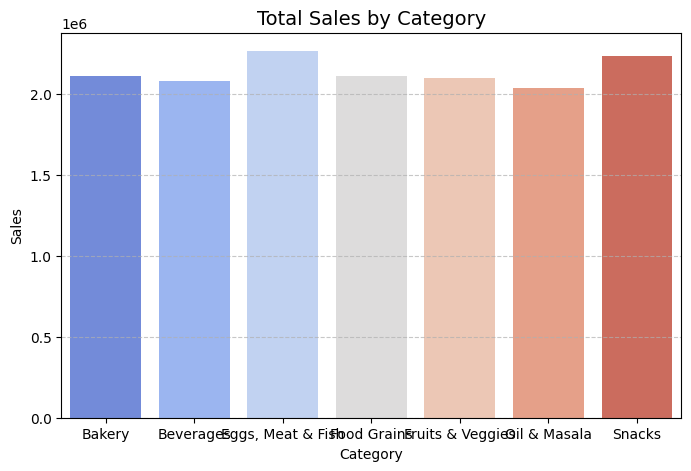

In [11]:
# Plot total sales by category
plt.figure(figsize=(8, 5))
sns.barplot(x='category', y='sales', data=category_sales, palette='coolwarm')
plt.title('Total Sales by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-12-c6f39b73ee12>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sub_category', y='sales', data=sub_category_sales, palette='viridis')


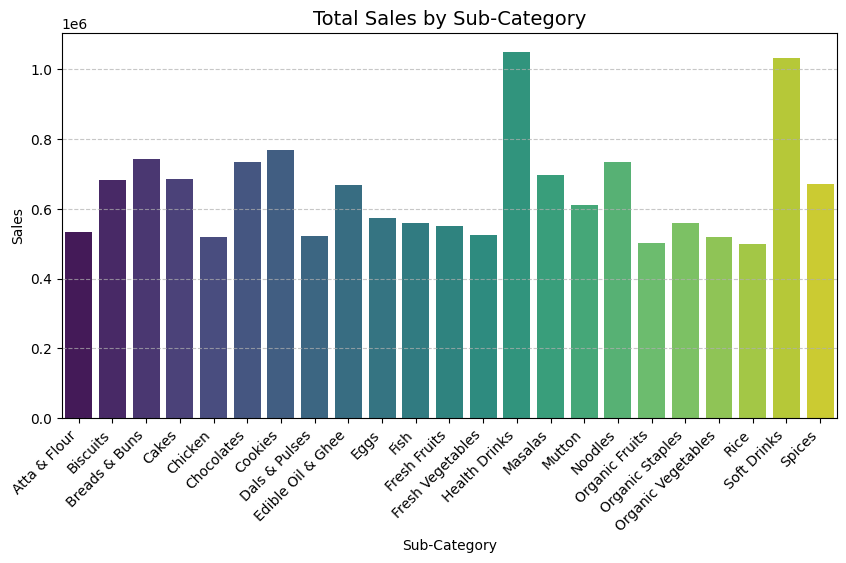

In [12]:
# Plot total sales by sub-category
plt.figure(figsize=(10, 5))
sns.barplot(x='sub_category', y='sales', data=sub_category_sales, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Total Sales by Sub-Category', fontsize=14)
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

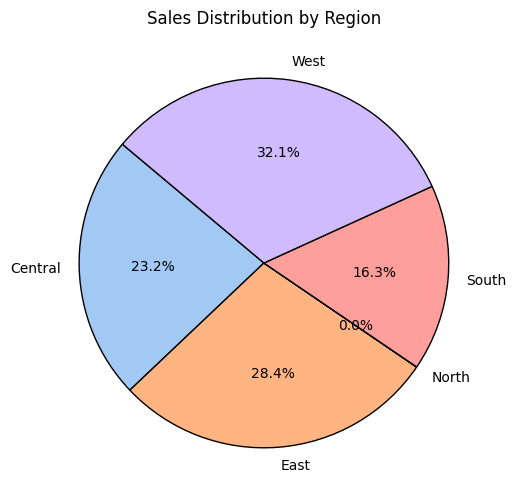

In [13]:
# Sales distribution by region (Pie chart)
region_sales = df.groupby('region')['sales'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(region_sales['sales'], labels=region_sales['region'], autopct='%1.1f%%',
        colors=sns.color_palette('pastel'), startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Sales Distribution by Region')
plt.show()

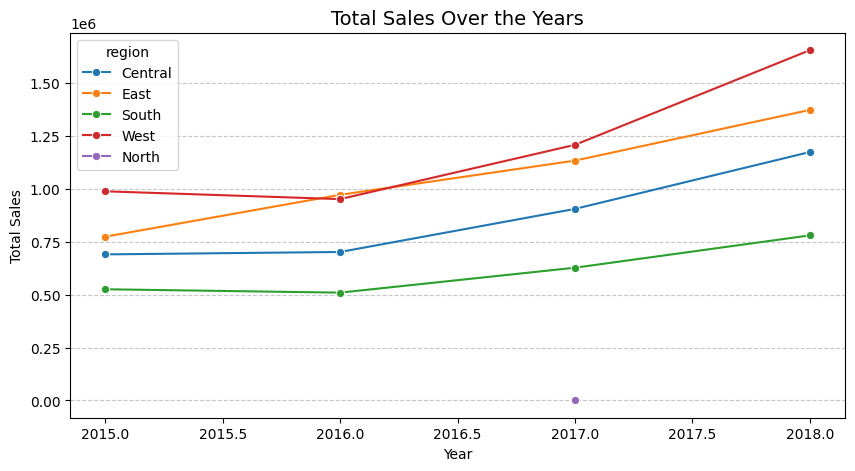

In [14]:
# Total sales over years (Line plot)
yearly_sales = df.groupby(['year', 'region'])['sales'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='sales', hue='region', data=yearly_sales, marker='o', palette='tab10')
plt.title('Total Sales Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

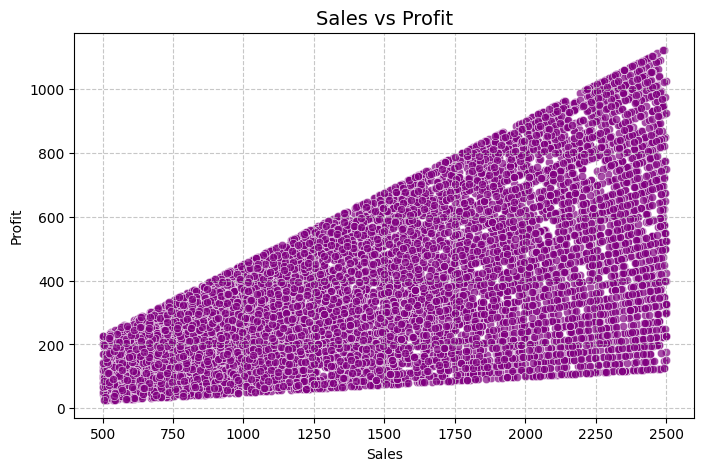

In [15]:
# Sales vs Profit Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sales', y='profit', data=df, alpha=0.7, color='purple')
plt.title('Sales vs Profit', fontsize=14)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x500 with 0 Axes>

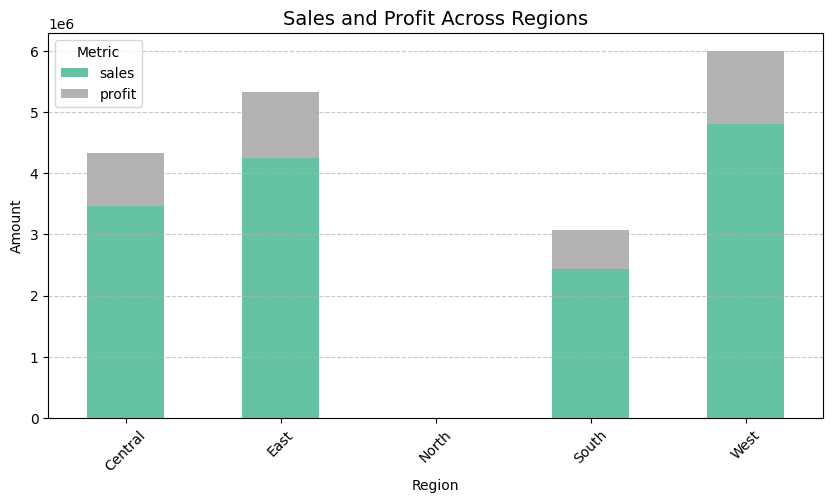

In [16]:
# Sales and Profit across regions
sales_profit = df.groupby('region')[['sales', 'profit']].sum().reset_index()
plt.figure(figsize=(10, 5))
sales_profit.plot(x='region', kind='bar', stacked=True, colormap='Set2', figsize=(10, 5))
plt.title('Sales and Profit Across Regions', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Amount')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

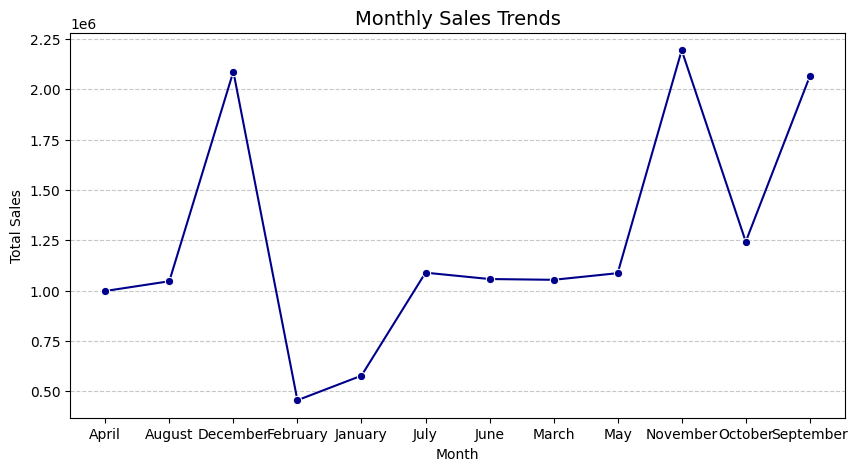

In [17]:
# **New Analysis 1: Monthly Sales Trends**
monthly_sales = df.groupby('month')['sales'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='sales', data=monthly_sales, marker='o', color='darkblue')
plt.title('Monthly Sales Trends', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-19-7cbdce6bea15>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='discount', data=discount_by_category, palette='Blues')


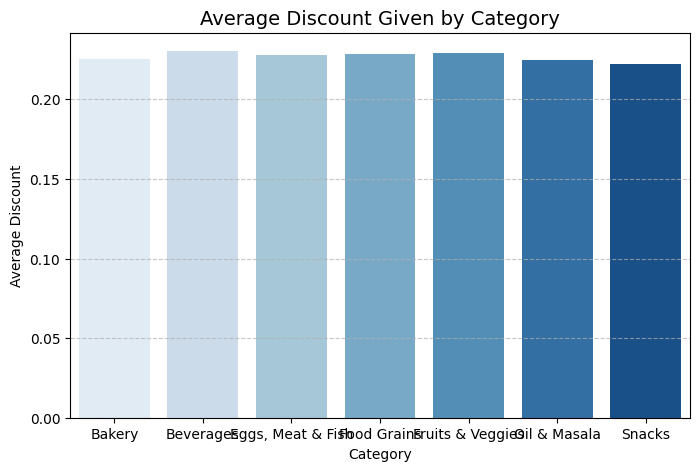

In [19]:
# **New Analysis 3: Average Discount Given by Category**
discount_by_category = df.groupby('category')['discount'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='category', y='discount', data=discount_by_category, palette='Blues')
plt.title('Average Discount Given by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Average Discount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

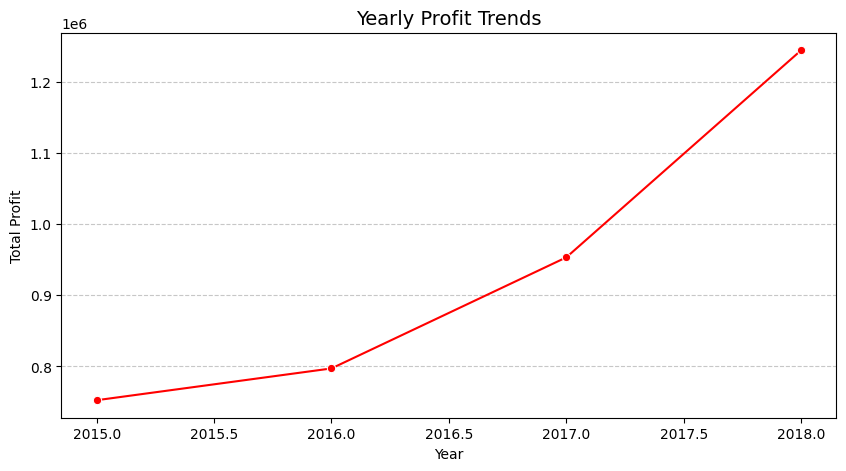

In [20]:
# **New Analysis 4: Yearly Profit Trends**
yearly_profit = df.groupby('year')['profit'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='profit', data=yearly_profit, marker='o', color='red')
plt.title('Yearly Profit Trends', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()